#### *Импортируем необходимые библиотеки и модули*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### *Считывем данные из Excel в DataFrame (Data_Parsing) и (Data_Company)*

In [2]:
Data_Parsing = pd.read_excel('data/Data_TSUM.xlsx', sheet_name=0)
# переименуем названия столбцов, для единообразия.
Data_Parsing.rename(columns={'Category': 'category'}, inplace=True)
Data_Parsing

,brand,category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164
71,Stone Island,Bags,sssss1111_32,~~~red,158
72,Stone Island,Bags,sssss1111_33,~~~red,194
73,Stone Island,Bags,sssss1111_34,~~~red,256


In [3]:
Data_Company = pd.read_excel('data/Data_TSUM.xlsx', sheet_name=1)
# переименуем названия столбцов, для единообразия.
Data_Company.rename(columns={'Category': 'category', 'current price': 'current_price'}, inplace=True)
Data_Company

,brand,category,item_id,color_id,current_price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


#### *Удаляем служебные символы ('_', '-', '~', '\\', '/'.) из Data_Parsing*

Данные служебные символы: _, -, ~, \\, /, находятся в столбцах 'producer_id' и 'producer_color'.

In [4]:
Data_Parsing['producer_id'] = Data_Parsing['producer_id'].apply(lambda x: x.translate({ord(i): None for i in '_-~\\/'}))
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(lambda x: x.translate({ord(i): None for i in '_-~\\/'}))
Data_Parsing

,brand,category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,256


#### *Подтягиваем к базе парсинга Data_Parsing данные из базы компании Data_Company (item_id, color_id, current_price)*

In [5]:
Data_Final = Data_Parsing.join(Data_Company[['item_id', 'color_id', 'current_price']])
Data_Final

,brand,category,producer_id,producer_color,price,item_id,color_id,current_price
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222


#### *Формируем столбец разницы цен в % (цена конкурента к нашей цене) в итоговой базе Data_Final*

In [6]:
Data_Final['price_ratio'] = round(Data_Final['price']/Data_Final['current_price']*100, 2)
Data_Final

,brand,category,producer_id,producer_color,price,item_id,color_id,current_price,price_ratio
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,67.61
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,116.77
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,78.63
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,117.37
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,163.40
...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,99.39
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,80.61
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,82.20
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,115.32


#### *Определяем сильные отклонения от среднего в разности цен в пределах бренда-категории и очищаем от них итоговую базу Data_Final (создаем новый столбец индикатор 'outlier' (установим 'yes' в строках с отклонениями))*

Определим количество брендов и категорий, а также количество товаров в каждом соотношении.

In [7]:
Data_Final[['brand', 'category']].nunique()

brand       3
category    2
dtype: int64

In [8]:
Data_Final[['brand', 'category']].value_counts()

brand         category
Brioni        Shoes       14
Stone Island  Shoes       14
Valentino     Shoes       14
Brioni        Bags        11
Stone Island  Bags        11
Valentino     Bags        11
dtype: int64

Присутствует три бренда: 'Brioni', 'Stone Island', 'Valentino' и две категории: 'Shoes' и 'Bags'. Соответственно, получается шесть сочетаний 'бренд - категория': 'Brioni - Shoes', 'Stone Island - Shoes', 'Valentino - Shoes', 'Brioni - Bags', 'Stone Island - Bags' и 'Valentino - Bags'. При этом в категориях обуви по 14 товаров, а в категориях сумок по 11 товаров.

Определяем сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убраем случайные выбросы, сильно искажающие сравнение). Критерий выбираем исходя из анализа выбросов. Построим гистограммы рспределения признака разности цен 'price_ratio' для каждого соотношения бренд - категория.

Первая группа графиков - с нормальной шкалой для  разности цен. Желтая линия - медиана разности цен. Синие штриховые линии - границы метода Тьюки (с границами: 1 квартиль - 1.5 межквартильных размаха и 3 квартиль + 1.5 межквартильных размаха). Красные штриховые линии - границы сигма метода (с границами: медиана +- 2 сигма (стандартное отклонение)). Для сигма метода берем именно +- 2 сигма, т.к. при +- 3 сигма выбросы не обнаруживаются (все значения находятся внутри границ).
Вторая группа графиков - тоже самое, но с логарифмической шкалой значений для разности цен.

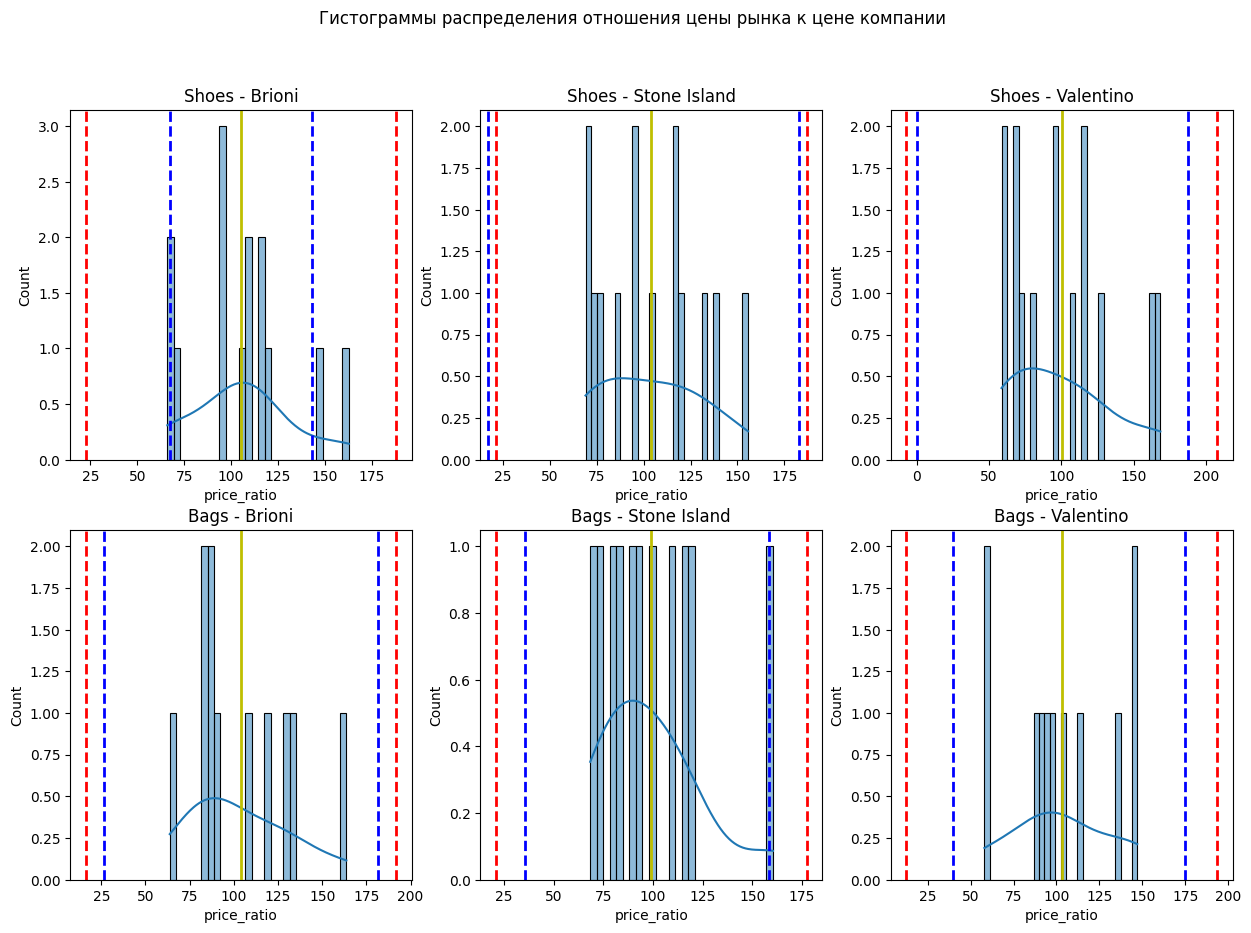

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Гистограммы распределения отношения цены рынка к цене компании')
r = c = 0
for i in ['Shoes', 'Bags']:
    for j in ['Brioni', 'Stone Island', 'Valentino']:
        df = Data_Final['price_ratio'][(Data_Final['brand'] == j) & (Data_Final['category'] == i)]
        iqr = df.quantile(0.75) - df.quantile(0.25)
        histplot = sns.histplot(df, kde=True, bins=28, ax=ax[r, c])
        histplot.axvline(df.mean(), color='y', lw=2)
        histplot.axvline(df.mean() + 3*df.std(), color='r', ls='--', lw=2)
        histplot.axvline(df.mean() - 3*df.std(), color='r', ls='--', lw=2)
        histplot.axvline(df.quantile(0.75) + 1.5*iqr, color='b', ls='--', lw=2)
        histplot.axvline(df.quantile(0.25) - 1.5*iqr, color='b', ls='--', lw=2)
        histplot.set_title(i + ' - ' + j);
        c += 1
    r += 1
    c = 0

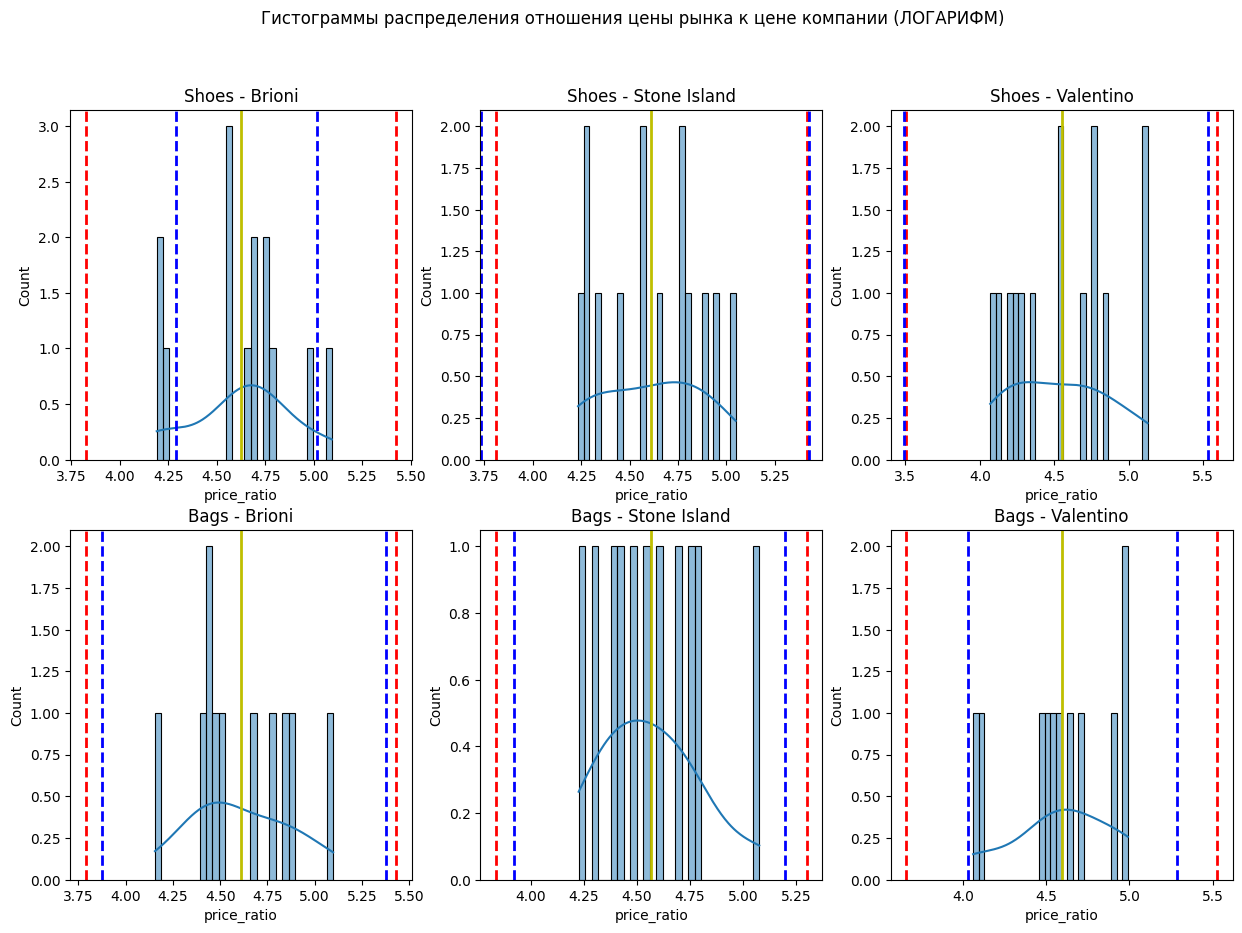

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Гистограммы распределения отношения цены рынка к цене компании (ЛОГАРИФМ)')
r = c = 0
for i in ['Shoes', 'Bags']:
    for j in ['Brioni', 'Stone Island', 'Valentino']:
        df = np.log(
            Data_Final['price_ratio'][(Data_Final['brand'] == j) & (Data_Final['category'] == i)])
        iqr = df.quantile(0.75) - df.quantile(0.25)
        histplot = sns.histplot(df, kde=True, bins=28, ax=ax[r, c])
        histplot.axvline(df.mean(), color='y', lw=2)
        histplot.axvline(df.mean() + 3*df.std(), color='r', ls='--', lw=2)
        histplot.axvline(df.mean() - 3*df.std(), color='r', ls='--', lw=2)
        histplot.axvline(df.quantile(0.75) + 1.5*iqr, color='b', ls='--', lw=2)
        histplot.axvline(df.quantile(0.25) - 1.5*iqr, color='b', ls='--', lw=2)
        histplot.set_title(i + ' - ' + j);
        c += 1
    r += 1
    c = 0

Кроме того, аналогично для каждой пары бренд - категория построим диаграмму рассеяния. Значение разности цен на оси у (по оси х - порядковые номера товара). Выбросы - это далеко отстоящие точки, именно по оси у, причем единичные по оси х.

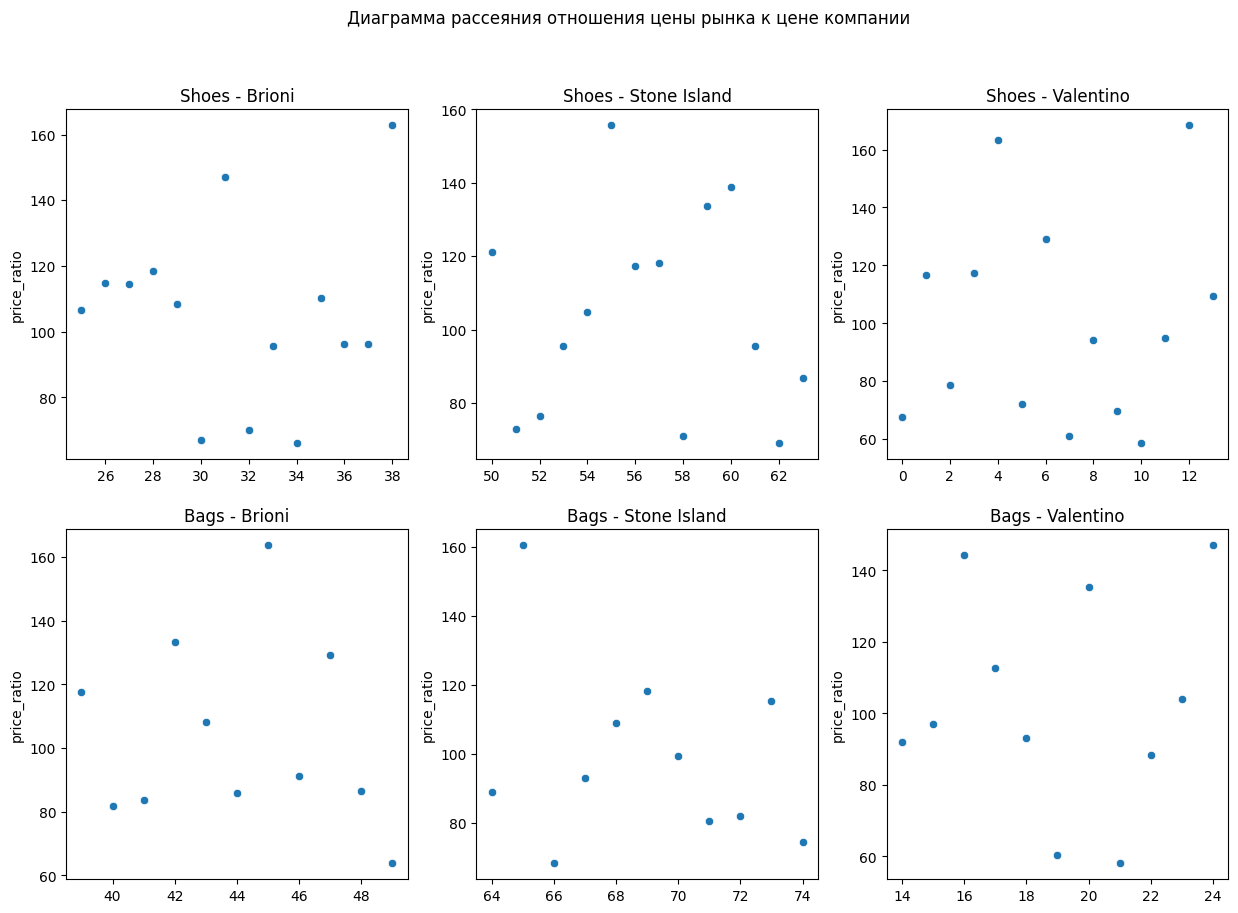

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Диаграмма рассеяния отношения цены рынка к цене компании')
r = c = 0
for i in ['Shoes', 'Bags']:
    for j in ['Brioni', 'Stone Island', 'Valentino']:
        df = Data_Final['price_ratio'][(Data_Final['brand'] == j) & (Data_Final['category'] == i)]
        iqr = df.quantile(0.75) - df.quantile(0.25)
        scatplot = sns.scatterplot(df, ax=ax[r, c])
        scatplot.set_title(i + ' - ' + j);
        c += 1
    r += 1
    c = 0

Определяем с помощью графиков выбросы: для брендов 'Brioni и 'Stone Island'  и категорий 'Shoes' и 'Bags'. Т.е всего четыре сочетания. Выбросы- крайние максимальные значения. Судя по графикам (диаграммы рассеяния) все они лежат выше значения 150 признака 'price_ratio'.

Создадим новый столбец индикатор 'outlier'. Установим для брендов 'Brioni и 'Stone Island': 'yes' для значений - выбросов и 'no' для остальных значений. В качестве границы примем 150.

In [12]:
Data_Final['outlier'] = 'no'
mask1 = (Data_Final['brand'] =='Brioni') & (Data_Final['price_ratio'] > 150)
mask2 = (Data_Final['brand'] =='Stone Island') & (Data_Final['price_ratio'] > 150)
Data_Final.loc[mask1 | mask2, 'outlier'] = 'yes'
Data_Final.sort_values('outlier').tail(10)

,brand,category,producer_id,producer_color,price,item_id,color_id,current_price,price_ratio,outlier
24,Valentino,Bags,aaaaa111135,red,225,aaaaa111135,red,153,147.06,no
23,Valentino,Bags,aaaaa111134,red,283,aaaaa111134,red,272,104.04,no
22,Valentino,Bags,aaaaa111133,red,168,aaaaa111133,red,190,88.42,no
21,Valentino,Bags,aaaaa111132,red,170,aaaaa111132,red,293,58.02,no
20,Valentino,Bags,aaaaa111131,red,256,aaaaa111131,red,189,135.45,no
19,Valentino,Bags,aaaaa111130,red,173,aaaaa111130,red,287,60.28,no
65,Stone Island,Bags,sssss111126,red,255,sssss111126,red,159,160.38,yes
38,Brioni,Shoes,bbbbb111124,white,298,bbbbb111124,white,183,162.84,yes
45,Brioni,Bags,bbbbb111131,red,257,bbbbb111131,red,157,163.69,yes
55,Stone Island,Shoes,sssss111116,black,288,sssss111116,black,185,155.68,yes


In [13]:
Data_Final.to_excel(r'data/Data_PriceRatio.xlsx', 
                      sheet_name='Data_PriceRatio', 
                      index=False
                      )